In [1]:
!pip install mplfinance

You should consider upgrading via the 'c:\users\saidj\onedrive\documentos\projects\forex_ml_bot\forex_ml_bot\mtvenv\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import clear_output

from sklearn.metrics import confusion_matrix, auc, roc_curve
import itertools
import yaml
import os
import numpy as np
from statistics import mean
from datetime import datetime, timedelta
import time
from sklearn.metrics import precision_recall_curve, auc
import os
import sys
pd.options.display.max_rows = 999
pd.set_option('display.float_format', '{:.4f}'.format)


In [3]:
root_dir = os.path.abspath(os.path.join(os.path.dirname('see_all_expewriments.ipynb'), '..'))
os.chdir(root_dir)
sys.path.insert(0, os.path.join(root_dir, 'src'))

In [4]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y plotea la matriz de confusión.
    La normalización se puede aplicar configurando `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()

In [5]:
with open('configs/project_config.yml', 'r') as archivo:
    config = yaml.safe_load(archivo)

initial_wallet_value = config['start_money']


In [6]:
# root_path = 'C:/Users/SaidJ/OneDrive/Documentos/projects/forex_ml_bot/experiments 20240623'

# iteration = '1'
# path = 'Mode_train-Model_gradient_boosting-TrainWw_5760-TrainPd_24-TradStgy_ml_strategy-PerFwTg_8-SL_10-RR_2-CloseTime_True-TS_False'


# iteration = '2'
# path = 'Mode_train-Model_random_forest-TrainWw_1920-TrainPd_24-TradStgy_ml_strategy-PerFwTg_8-SL_10-RR_4-CloseTime_True-TS_False'


# iteration = '3'
# root_path = f'./backbone/data/backtest/experiments/{iteration}'

root_path = f'./backbone/data/backtest/experiments/'
path = 'Mode_train-Model_gradient_boosting-TrainWw_11520-TrainPd_24-TradStgy_bband_aroon_stgy-PerFwTg_8-SL_25-RR_3-CloseTime_True-TS_False'



orders = pd.read_csv(os.path.join(root_path, path, 'orders.csv'))
wallet = pd.read_csv(os.path.join(root_path, path, 'wallet.csv'))


In [7]:
orders.head(50)

,id,ticker,operation_type,open_time,close_time,open_price,last_price,close_price,profit,stop_loss,take_profit,units,profit_in_pips,comment
0,4acb0aa5-4a9d-11ef-b58c-f7a510197866,USDCHF,OperationType.BUY,2018-01-02 13:00:00,2018-01-02 21:00:00,0.9714,0.9714,0.9719,2.0800,0.9689,0.9789,4000,0.0005,ClosePositionType.DAYS
1,4d587244-4a9d-11ef-a14a-f7a510197866,USDJPY,OperationType.SELL,2018-01-05 12:00:00,2018-01-05 20:00:00,113.2340,113.2340,113.1660,2.7200,113.4840,112.4840,40,0.0680,ClosePositionType.DAYS
2,4f4dc6ba-4a9d-11ef-aea7-f7a510197866,AUDUSD,OperationType.BUY,2018-01-09 19:00:00,2018-01-10 03:00:00,0.7819,0.7819,0.7822,1.1655,0.7794,0.7894,4019,0.0003,ClosePositionType.DAYS
3,5372da0b-4a9d-11ef-b7c4-f7a510197866,USDCAD,OperationType.SELL,2018-01-17 18:00:00,2018-01-18 02:00:00,1.2444,1.2444,1.2458,-5.7141,1.2468,1.2368,4024,-0.0014,ClosePositionType.DAYS
4,546b9827-4a9d-11ef-ad3f-f7a510197866,GBPUSD,OperationType.SELL,2018-01-18 19:00:00,2018-01-19 02:00:00,1.3877,1.3877,1.3902,-10.0425,1.3902,1.3802,4001,-0.0025,ClosePositionType.STOP_LOSS
5,54dbee36-4a9d-11ef-8d37-f7a510197866,GBPUSD,OperationType.SELL,2018-01-19 11:00:00,2018-01-19 17:00:00,1.3914,1.3914,1.3839,29.7471,1.3939,1.3839,3961,0.0075,ClosePositionType.TAKE_PROFIT
6,5b498602-4a9d-11ef-9078-f7a510197866,GBPUSD,OperationType.SELL,2018-02-01 23:00:00,2018-02-02 07:00:00,1.4260,1.4260,1.4258,0.7344,1.4285,1.4185,4080,0.0002,ClosePositionType.DAYS
7,5ba8d30b-4a9d-11ef-b855-f7a510197866,USDJPY,OperationType.SELL,2018-02-02 13:00:00,2018-02-02 15:00:00,109.8690,109.8690,110.1190,-10.2500,110.1190,109.1190,41,-0.2500,ClosePositionType.STOP_LOSS
8,5c2a1aa7-4a9d-11ef-bbea-f7a510197866,USDCAD,OperationType.SELL,2018-02-05 01:00:00,2018-02-05 09:00:00,1.2434,1.2434,1.2423,4.7696,1.2459,1.2359,4042,0.0012,ClosePositionType.DAYS
9,5dc6b94d-4a9d-11ef-b6cc-f7a510197866,AUDUSD,OperationType.BUY,2018-02-07 13:00:00,2018-02-07 18:00:00,0.7869,0.7869,0.7844,-10.1931,0.7844,0.7944,4061,-0.0025,ClosePositionType.STOP_LOSS


In [8]:
orders = orders.sort_values(by='close_time')

# Cantidad de compras y ventas

[]

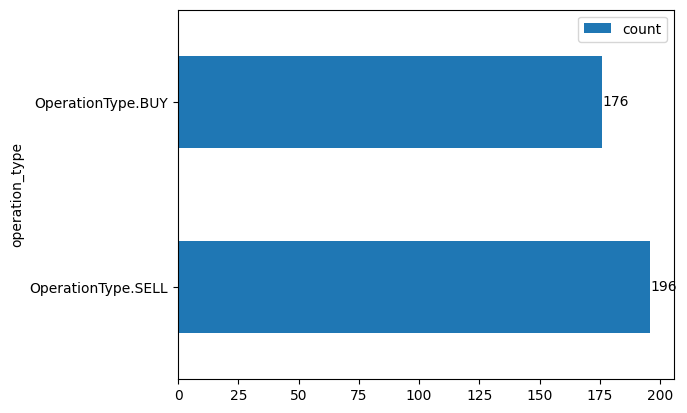

In [9]:
ax = pd.DataFrame(orders.operation_type.value_counts()).plot.barh()
ax.bar_label(ax.containers[0])
ax.plot()

# Compras que salieron bien

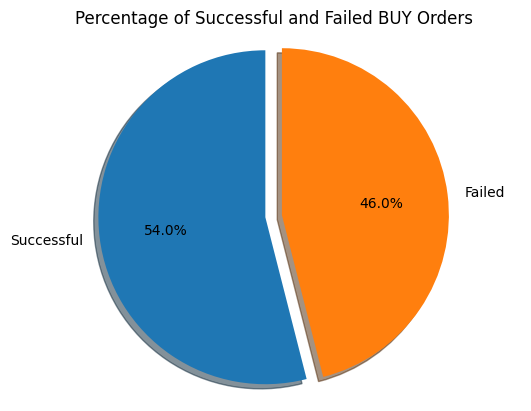

In [10]:
try:
    # Calcular el número de operaciones exitosas y fallidas
    successful_buys = orders[(orders['operation_type'] == 'OperationType.BUY') & (orders['profit'] >= 0)].shape[0]
    failed_buys = orders[(orders['operation_type'] == 'OperationType.BUY') & (orders['profit'] < 0)].shape[0]
    
    # Calcular los porcentajes
    total_buys = successful_buys + failed_buys
    percent_successful = (successful_buys / total_buys) * 100
    percent_failed = (failed_buys / total_buys) * 100
    
    # Crear un gráfico de torta
    labels = 'Successful', 'Failed'
    sizes = [percent_successful, percent_failed]
    explode = (0.1, 0)  # Explode the first slice (i.e., 'Successful')
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.title('Percentage of Successful and Failed BUY Orders')
    plt.show()
except:
    print('no hay compras')

# Ventas que salieron bien

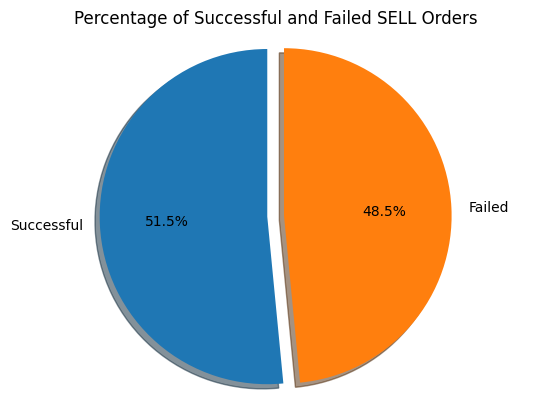

In [11]:
# Calcular el número de operaciones exitosas y fallidas
successful_buys = orders[(orders['operation_type'] == 'OperationType.SELL') & (orders['profit'] >= 0)].shape[0]
failed_buys = orders[(orders['operation_type'] == 'OperationType.SELL') & (orders['profit'] < 0)].shape[0]

# Calcular los porcentajes
total_buys = successful_buys + failed_buys
percent_successful = (successful_buys / total_buys) * 100
percent_failed = (failed_buys / total_buys) * 100

# Crear un gráfico de torta
labels = 'Successful', 'Failed'
sizes = [percent_successful, percent_failed]
explode = (0.1, 0)  # Explode the first slice (i.e., 'Successful')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of Successful and Failed SELL Orders')
plt.show()

# Cierres por SL y TP

[]

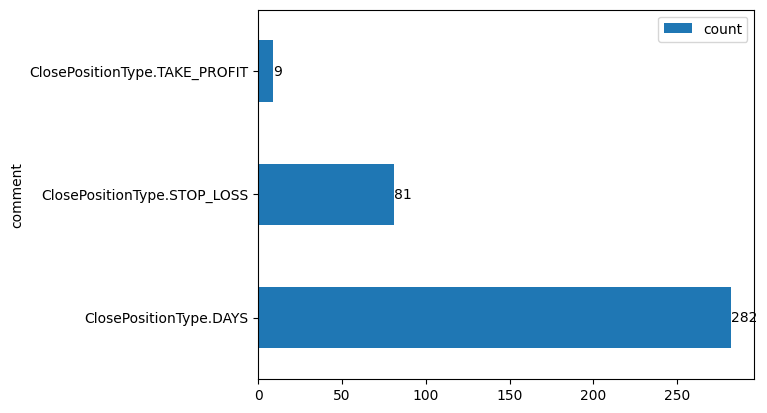

In [12]:
ax = pd.DataFrame(orders.comment.value_counts()).plot.barh()
ax.bar_label(ax.containers[0])
ax.plot()

# Operaciones que cerraron por dias y quedaron positivas

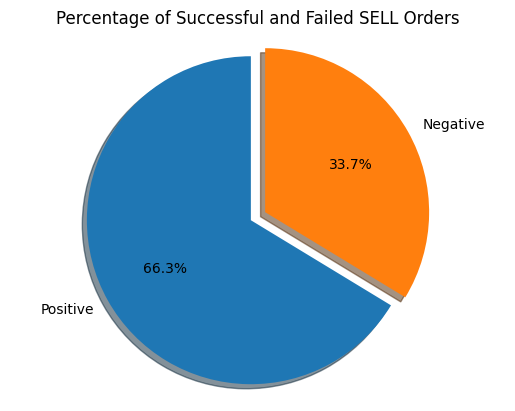

In [13]:
total_days = orders[orders['comment'] == 'ClosePositionType.DAYS']
positive_days = total_days[total_days['profit'] >= 0]
negative_days = total_days[total_days['profit'] < 0]

# Calcula los tamaños
total_count = total_days.shape[0]
positive_count = positive_days.shape[0]
negative_count = negative_days.shape[0]

# Calcula los porcentajes
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100

# Crea los datos para el gráfico de torta
labels = ['Positive', 'Negative']
sizes = [positive_percentage, negative_percentage]

explode = (0.1, 0)  # Explode the first slice (i.e., 'Successful')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of Successful and Failed SELL Orders')
plt.show()

# Cierres por SL que terminaron positivos

In [14]:
print(orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['profit']>=0)].shape[0])
orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['profit']>=0)].shape[0] / orders[(orders['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0


0.0

# Cierres por SL en que se minimizaron las perdidas

In [15]:
print(orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['last_price']!=orders['open_price'])].shape[0])
orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['last_price']!=orders['open_price'])].shape[0] / orders[(orders['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0


0.0

# Desempenio por ticker

In [16]:
orders_by_ticker = orders.groupby('ticker').agg(
    positivas=('profit', lambda x: (x > 0).sum()),
    negativas=('profit', lambda x: (x < 0).sum()),
    profit=('profit', lambda x: (x).sum()),
).reset_index()

orders_by_ticker['perc'] = (orders_by_ticker['positivas'] / (orders_by_ticker['positivas'] + orders_by_ticker['negativas'])) * 100
orders_by_ticker.sort_values(by='perc', ascending=False)

,ticker,positivas,negativas,profit,perc
1,EURUSD,44,21,162.8857,67.6923
2,GBPUSD,36,27,186.7427,57.1429
0,AUDUSD,35,34,-18.6165,50.7246
4,USDCHF,28,30,11.1684,48.2759
3,USDCAD,29,34,25.8024,46.0317
5,USDJPY,23,30,-56.1940,43.3962


# Rendimiento por mes

In [17]:
orders_per_month = orders[['close_time','profit', 'comment']].copy()

orders['close_time'] = pd.to_datetime(orders['close_time'])
orders_per_month['close_time'] = orders['close_time'].dt.to_period('M')


orders_per_month_gb = orders_per_month.groupby(by=['close_time']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'close_time':['2022-12'],'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'].shift(1))

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops'])

orders_per_month_gb[[
    'close_time', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

,close_time,amount_ops,take_profit,stop_loss,good_ops,bad_ops,perc_good_ops,max_profit,profit_sum,profit_cumsum,perc_change
0,2022-12,0,NaN,NaN,NaN,NaN,NaN,NaN,1000.0000,1000.0000,NaN
0,2018-01,6,1.0000,1.0000,4.0000,2.0000,0.6670,29.7470,19.9560,1019.9560,0.0200
1,2018-02,10,1.0000,5.0000,5.0000,5.0000,0.5000,29.9500,-8.8630,1011.0930,-0.0090
2,2018-03,15,0.0000,5.0000,7.0000,8.0000,0.4670,12.2800,-22.4480,988.6460,-0.0220
3,2018-04,8,0.0000,1.0000,4.0000,4.0000,0.5000,17.7980,14.3980,1003.0440,0.0150
4,2018-05,8,0.0000,1.0000,4.0000,4.0000,0.5000,12.9600,2.8650,1005.9080,0.0030
5,2018-06,4,0.0000,1.0000,2.0000,2.0000,0.5000,9.6480,0.3990,1006.3070,0.0000
6,2018-07,4,0.0000,2.0000,2.0000,2.0000,0.5000,3.5910,-15.2100,991.0970,-0.0150
7,2018-08,6,0.0000,1.0000,3.0000,3.0000,0.5000,9.7130,5.3660,996.4640,0.0050
8,2018-09,6,0.0000,0.0000,4.0000,2.0000,0.6670,7.5710,5.4000,1001.8640,0.0050


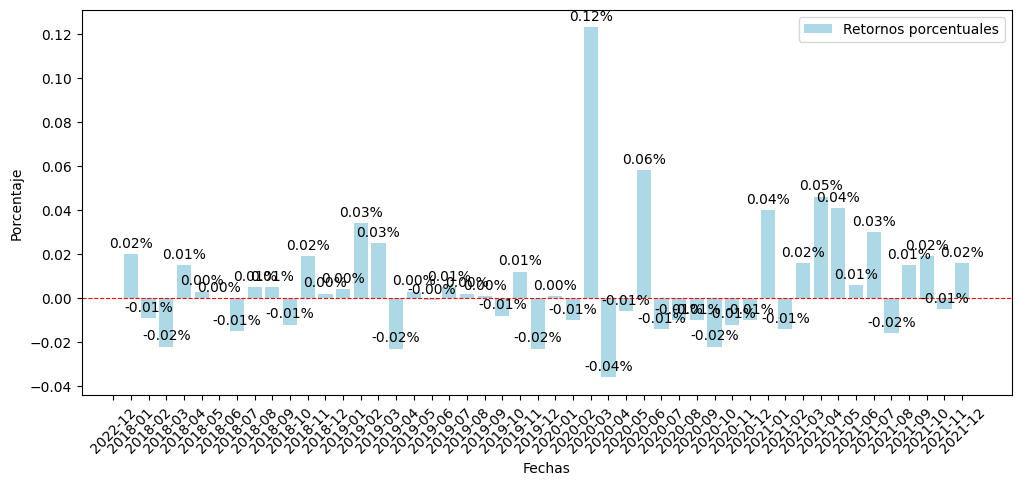

In [18]:
import matplotlib.pyplot as plt

# Datos de ejemplo
grow_perc = orders_per_month_gb[['close_time', 'perc_change']]
fig, ax = plt.subplots(figsize=(12, 5))

x = grow_perc['close_time'].astype(str)
y = grow_perc['perc_change']

# Crear barras
bars = ax.bar(x, y, label='Retornos porcentuales', color='lightblue')

# Agregar etiquetas sobre las barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                textcoords="offset points",
                ha='center', va='bottom')

# Agregar una línea de puntos horizontal en el valor 0
ax.axhline(0, color='red', linewidth=0.8, linestyle='--')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Porcentaje')
ax.legend()

plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


In [19]:
# Crear una columna que indique si la operación fue una pérdida
orders['is_loss'] = orders['profit'] < 0

# Crear una columna que cuente las rachas de pérdidas consecutivas
orders['consecutive_losses'] = orders['is_loss'].cumsum() - orders['is_loss'].cumsum().where(~orders['is_loss']).ffill().fillna(0).astype(int)

# Encontrar la máxima cantidad de pérdidas consecutivas
max_consecutive_losses = orders['consecutive_losses'].max()

print(f"La cantidad máxima de pérdidas consecutivas es: {max_consecutive_losses}")


La cantidad máxima de pérdidas consecutivas es: 5


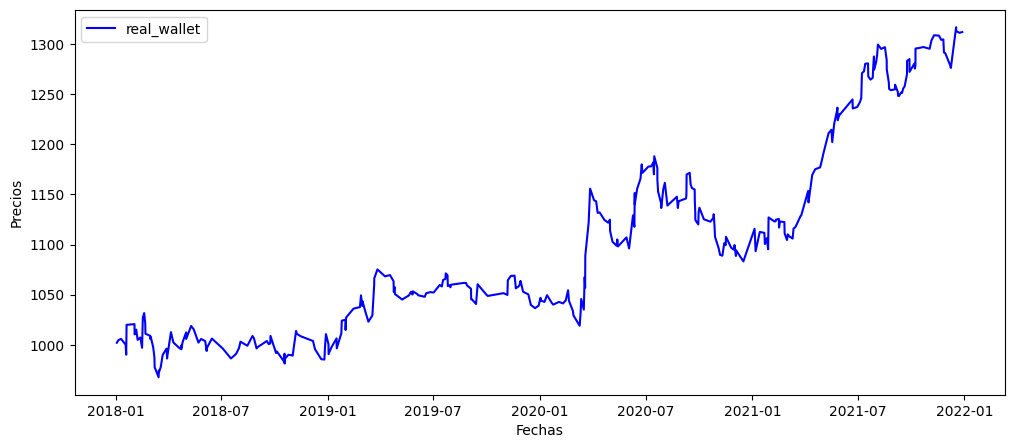

In [20]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 5))

# Datos de ejemplo
x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea
# Crear una figura y ejes
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='real_wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [21]:
wallet.tail(1)

,date,wallet
357,2021-12-28 05:00:00,1311.7887


In [22]:
orders_per_month_gb.perc_change.mean()

0.006000000000000001

In [23]:
orders_per_month_gb.perc_change.std()

0.026221641216466723

In [24]:
change_percent = orders_per_month_gb.perc_change.reset_index().copy().drop(columns='index')
change_percent.fillna(0, inplace=True)

# Inicializar el valor de partida
initial_value = 3000

# Crear una columna para la suma acumulada
change_percent['cumulative_sum'] = initial_value

# Calcular la suma acumulada basada en los porcentajes
for i in range(1, len(change_percent)):
    change_percent.loc[i, 'cumulative_sum'] = change_percent.loc[i-1, 'cumulative_sum'] * (1 + change_percent.loc[i, 'perc_change'])

change_percent

,perc_change,cumulative_sum
0,0.0000,3000.0000
1,0.0200,3060.0000
2,-0.0090,3032.4600
3,-0.0220,2965.7459
4,0.0150,3010.2321
5,0.0030,3019.2628
6,0.0000,3019.2628
7,-0.0150,2973.9738
8,0.0050,2988.8437
9,0.0050,3003.7879


# Rendimiento por dia

In [25]:
import mplfinance as mpf
import matplotlib.pyplot as plt

In [26]:
# import pandas as pd
# import numpy as np
# import mplfinance as mpf
# import matplotlib.pyplot as plt
# from datetime import timedelta

# ticker = 'USDJPY'

# for ticker in ['EURUSD', 'GBPUSD', 'USDJPY', 'USDCAD', 'AUDUSD', 'USDCHF']:
#     # Cargar los datos de precios históricos
#     prices = pd.read_csv(f'./backbone/data/backtest/symbols/{ticker}.csv')
    
#     # Convertir las columnas de fechas a formato datetime
#     prices['Date'] = pd.to_datetime(prices['Date'])
#     orders['close_time'] = pd.to_datetime(orders['close_time'])
#     orders['open_time'] = pd.to_datetime(orders['open_time'])
    
#     for index, order in orders[orders.ticker == ticker].iterrows():
#         date_from = order.open_time - timedelta(hours=24)
#         date_to = order.close_time + timedelta(hours=24)
        
#         # Filtrar los precios históricos para el rango de fechas relevante
#         historical_prices = prices[
#             (prices['Date'] >= date_from) &
#             (prices['Date'] <= date_to)
#         ].copy()
    
#         historical_prices.set_index('Date', inplace=True)
    
#         # Crear las listas de anotaciones inicializadas con NaN
#         open_annotations = [np.nan] * len(historical_prices)
#         close_annotations = [np.nan] * len(historical_prices)
    
#         # Buscar las posiciones correspondientes a las fechas de las operaciones
#         if order.open_time in historical_prices.index:
#             open_annotations[historical_prices.index.get_loc(order.open_time)] = order.open_price
#         if order.close_time in historical_prices.index:
#             close_annotations[historical_prices.index.get_loc(order.close_time)] = order.close_price
    
#         if order.operation_type == 'OperationType.BUY':
#             color_open = 'green'
#             color_close = 'lime'
#             marker_open = '^'  # Flecha hacia arriba
#             marker_close = 'o'  # Círculo
#         else:
#             color_open = 'brown'
#             color_close = 'brown'
#             marker_open = 'v'  # Flecha hacia abajo
#             marker_close = 'o'  # Círculo
    
#         # Crear los addplot
#         opens = mpf.make_addplot(open_annotations, type='scatter', markersize=100, marker=marker_open, color=color_open)
#         closes = mpf.make_addplot(close_annotations, type='scatter', markersize=100, marker=marker_close, color=color_close)
#         lower_bband = mpf.make_addplot(historical_prices['lower_bband'])
#         upper_bband = mpf.make_addplot(historical_prices['upper_bband'])
    
#         # Crear el gráfico de velas japonesas con mplfinance
#         fig, axlist = mpf.plot(
#             historical_prices, 
#             type='candle', 
#             style='yahoo', 
#             returnfig=True, 
#             volume=False, 
#             title=f'{ticker} Price with Buy/Sell Trades', 
#             figratio=(20,6),
#             addplot=[opens, closes, lower_bband, upper_bband]
#         )
    
#         # Agregar las operaciones al gráfico
#         ax = axlist[0]  # Acceder al primer subplot, que contiene el gráfico de velas
#         # Agregar líneas horizontales para stop loss, take profit y precio de apertura
#         ax.axhline(order.stop_loss, color='red', linewidth=0.8, linestyle='--', label='Stop Loss')
#         ax.axhline(order.take_profit, color='green', linewidth=0.8, linestyle='--', label='Take Profit')
#         ax.axhline(order.open_price, color='blue', linewidth=0.8, linestyle='--', label='Open Price')
    
#         # Añadir etiquetas y leyenda
#         handles, labels = ax.get_legend_handles_labels()
#         by_label = dict(zip(labels, handles))
#         ax.legend(by_label.values(), by_label.keys())
        
#         plt.xticks(rotation=45)
    
#         plt.show()
        
#         print(date_from, date_to)
        
#         a = input()  # Pausa para la interacción del usuario
#         clear_output()
        
#         plt.close(fig)  # Cerrar la figura para la siguiente iteración


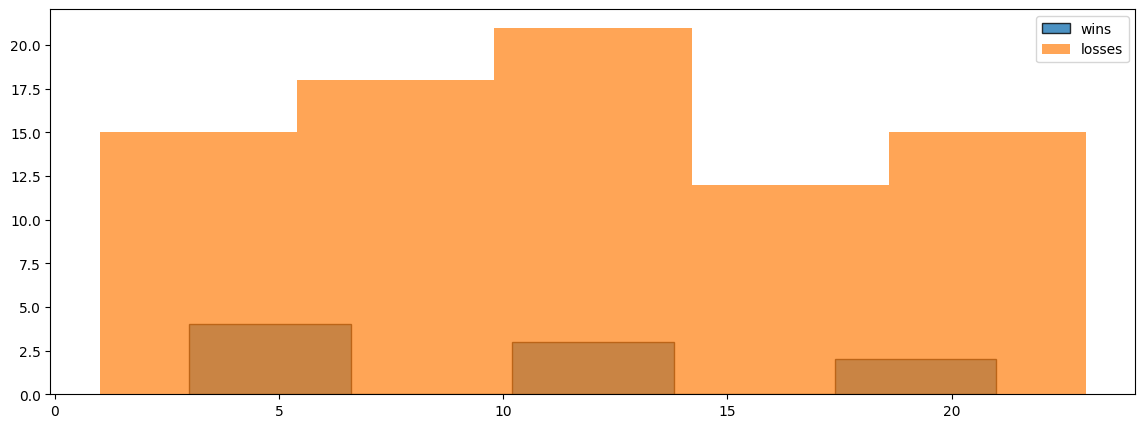

In [27]:
orders.open_time = pd.to_datetime(orders.open_time)
losses = orders[(orders.comment == 'ClosePositionType.STOP_LOSS')].copy()
wins = orders[(orders.comment == 'ClosePositionType.TAKE_PROFIT')].copy()
wins['open_time'] = wins.open_time.dt.hour
losses['open_time'] = losses.open_time.dt.hour

plt.figure(figsize=(14, 5))

# plotting first histogram
plt.hist(wins['open_time'], label='wins', alpha=.8, edgecolor='black', bins=5)

# plotting second histogram
plt.hist(losses['open_time'], label='losses', alpha=0.7, bins=5)
plt.legend()

# Showing the plot using plt.show()
plt.show()


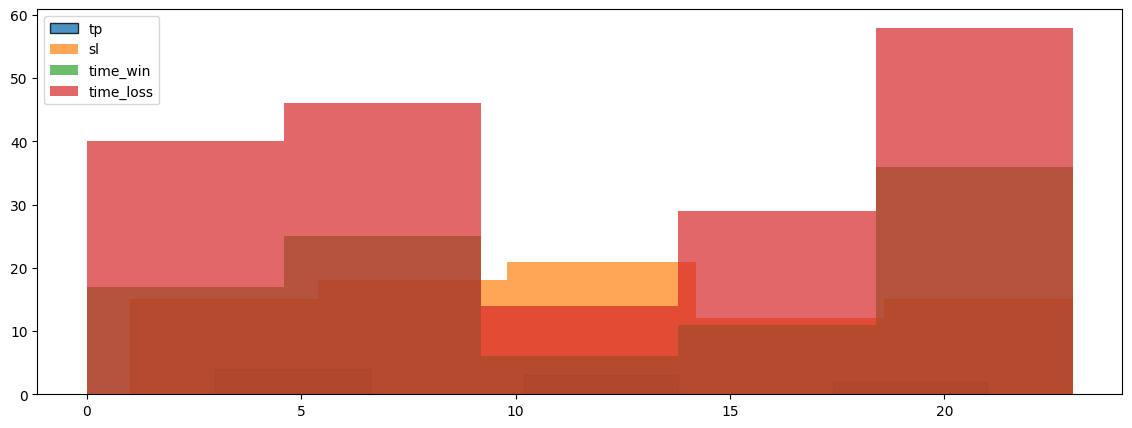

In [28]:
orders.open_time = pd.to_datetime(orders.open_time)

orders_tp = orders[(orders.comment == 'ClosePositionType.TAKE_PROFIT')].copy()
orders_sl = orders[(orders.comment == 'ClosePositionType.STOP_LOSS')].copy()

orders_time_win = orders[(orders.comment == 'ClosePositionType.DAYS') & (orders.profit < 0)].copy()
orders_time_loss = orders[(orders.comment == 'ClosePositionType.DAYS') & (orders.profit >= 0 )].copy()

orders_tp['open_time'] = orders_tp.open_time.dt.hour
orders_sl['open_time'] = orders_sl.open_time.dt.hour
orders_time_win['open_time'] = orders_time_win.open_time.dt.hour
orders_time_loss['open_time'] = orders_time_loss.open_time.dt.hour

plt.figure(figsize=(14, 5))

# plotting first histogram
plt.hist(orders_tp['open_time'], label='tp', alpha=.8, edgecolor='black', bins=5)
plt.hist(orders_sl['open_time'], label='sl', alpha=0.7, bins=5)
plt.hist(orders_time_win['open_time'], label='time_win', alpha=0.7, bins=5)
plt.hist(orders_time_loss['open_time'], label='time_loss', alpha=0.7, bins=5)

plt.legend()

# Showing the plot using plt.show()
plt.show()


In [29]:
orders_per_month = orders[['close_time','comment', 'ticker', 'profit']].copy()
orders_per_month['close_time'] = pd.to_datetime(orders_per_month['close_time'])
orders_per_month['year'] = orders_per_month['close_time'].dt.year
orders_per_month['month'] = orders_per_month['close_time'].dt.month
orders_per_month['day'] = orders_per_month['close_time'].dt.day

orders_per_month_gb = orders_per_month.groupby(by=['year','month', 'day']).agg(
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit=('profit', lambda x: (x).sum()),

)

orders_per_month_gb['tp_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['take_profit'].cumsum()
orders_per_month_gb['sl_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['stop_loss'].cumsum()
orders_per_month_gb['profit_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['profit'].cumsum()
orders_per_month_gb

take_profit  stop_loss   profit  tp_cumsum  sl_cumsum  \
year month day                                                          
2018 1     2              0          0   2.0800          0          0   
           5              0          0   2.7200          0          0   
           10             0          0   1.1655          0          0   
           18             0          0  -5.7141          0          0   
           19             1          1  19.7046          1          1   
     2     2              0          1  -9.5156          0          1   
           5              0          0   4.7696          0          1   
           7              0          1 -10.1931          0          2   
           12             0          0   2.2914          0          2   
           15             0          1 -10.1934          0          3   
           16             1          0  29.9499          1          3   
           19             0          0   4.6420          1          3   
           20             0          1 -10.2350          1          4   
           21             0          1 -10.3784          1          5   
     3     1              0          0  -5.4123          0          0   
           2              0          0   2.0920          0          0   
           6              0          1 -10.2387          0          1   
           8              0          1 -10.0947          0          2   
           9              0          1  -9.7500          0          3   
           15             0          1  -9.9339          0          4   
           16             0          0   4.9548          0          4   
           19             0          0   5.0972          0          4   
           22             0          0  12.2805          0          4   
           29             0          0   6.2172          0          4   
           30             0          1  -7.6598          0          5   
     4     4              0          0  17.7975          0          0   
           6              0          0   6.2403          0          0   
           10             0          1 -10.2490          0          1   
           20             0          0  -5.5338          0          1   
           24             0          0   0.3989          0          1   
           26             0          0   5.7442          0          1   
     5     2              0          0   2.8336          0          0   
           10             0          0  12.9600          0          0   
           15             0          0  -3.3620          0          0   
           17             0          0  -2.9653          0          0   
           23             0          1 -10.2500          0          1   
           28             0          0   3.6482          0          1   
     6     4              0          0  -2.1327          0          0   
           6              0          1  -7.1169          0          1   
           15             0          0   9.6485          0          1   
     7     4              0          1 -10.1028          0          1   
           18             0          1  -9.7633          0          2   
           27             0          0   4.6563          0          2   
     8     1              0          0   5.7082          0          0   
           3              0          0   6.3393          0          0   
           15             0          0  -4.0130          0          0   
           24             0          0   9.7127          0          0   
           27             0          0  -2.3807          0          0   
           31             0          1 -10.0000          0          1   
     9     3              0          0   1.5545          0          0   
           18             0          0   5.8283          0          0   
           21             0          0  -3.0514          0          0   
           24             0          0   8.1718          0          0   
 

# Que hubiera pasado si no se operaba con algunos tickers?

In [30]:
tickers_permitidos = orders_by_ticker[orders_by_ticker['profit']>0].ticker.unique()
print(tickers_permitidos)

# tickers_permitidos = [
#     'EURUSD', 
#     'GBPUSD', 
#     'USDJPY', 
#     # 'USDCAD', 
#     'AUDUSD', 
#     'USDCHF'
# ]

orders_min = orders[orders['ticker'].isin(tickers_permitidos)].copy().reset_index()

['EURUSD' 'GBPUSD' 'USDCAD' 'USDCHF']


# Rendimiento por mes

In [31]:
orders_min['close_month'] = pd.to_datetime(orders_min['close_time'])
orders_min['close_month'] = orders_min['close_month'].dt.to_period('M')

orders_per_month_gb = orders_min.groupby(by=['close_month']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'close_time':['2022-12'],'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'])

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops']) * 100

orders_per_month_gb = orders_per_month_gb[[
    'close_month', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

orders_per_month_gb

,close_month,amount_ops,take_profit,stop_loss,good_ops,bad_ops,perc_good_ops,max_profit,profit_sum,profit_cumsum,perc_change
0,NaT,0,NaN,NaN,NaN,NaN,NaN,NaN,1000.0000,1000.0000,NaN
0,2018-01,4,1.0000,1.0000,2.0000,2.0000,50.0000,29.7470,16.0700,1016.0700,0.0160
1,2018-02,6,1.0000,2.0000,4.0000,2.0000,66.6670,29.9500,19.6680,1035.7380,0.0190
2,2018-03,9,0.0000,3.0000,4.0000,5.0000,44.4440,12.2800,-9.6410,1026.0970,-0.0090
3,2018-04,7,0.0000,1.0000,4.0000,3.0000,57.1430,17.7980,19.9320,1046.0290,0.0190
4,2018-05,3,0.0000,0.0000,2.0000,1.0000,66.6670,4.4530,1.5220,1047.5500,0.0010
5,2018-06,3,0.0000,1.0000,1.0000,2.0000,33.3330,9.6480,-2.3610,1045.1890,-0.0020
6,2018-07,4,0.0000,2.0000,2.0000,2.0000,50.0000,3.5910,-15.2100,1029.9790,-0.0150
7,2018-08,5,0.0000,0.0000,3.0000,2.0000,60.0000,9.7130,15.3660,1045.3460,0.0150
8,2018-09,5,0.0000,0.0000,3.0000,2.0000,60.0000,7.5710,3.8450,1049.1910,0.0040


In [32]:
orders_min['wallet'] = orders_min['profit']
orders_min.loc[0, 'wallet'] = initial_wallet_value + orders_min.iloc[0]['profit']
orders_min['wallet'] = orders_min['wallet'].cumsum()

In [33]:
orders_by_ticker = orders_min.groupby('ticker').agg(
    positivas=('profit', lambda x: (x > 0).sum()),
    negativas=('profit', lambda x: (x < 0).sum()),
    profit=('profit', lambda x: (x).sum()),
).reset_index()

orders_by_ticker['perc'] = orders_by_ticker['positivas'] / (orders_by_ticker['positivas'] + orders_by_ticker['negativas'])
orders_by_ticker.sort_values(by='perc', ascending=False)

,ticker,positivas,negativas,profit,perc
0,EURUSD,44,21,162.8857,0.6769
1,GBPUSD,36,27,186.7427,0.5714
3,USDCHF,28,30,11.1684,0.4828
2,USDCAD,29,34,25.8024,0.4603


In [34]:
orders_min[(orders_min['comment']=='ClosePositionType.STOP_LOSS') & (orders_min['profit']>=0)].shape[0] / orders_min[(orders_min['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0.0

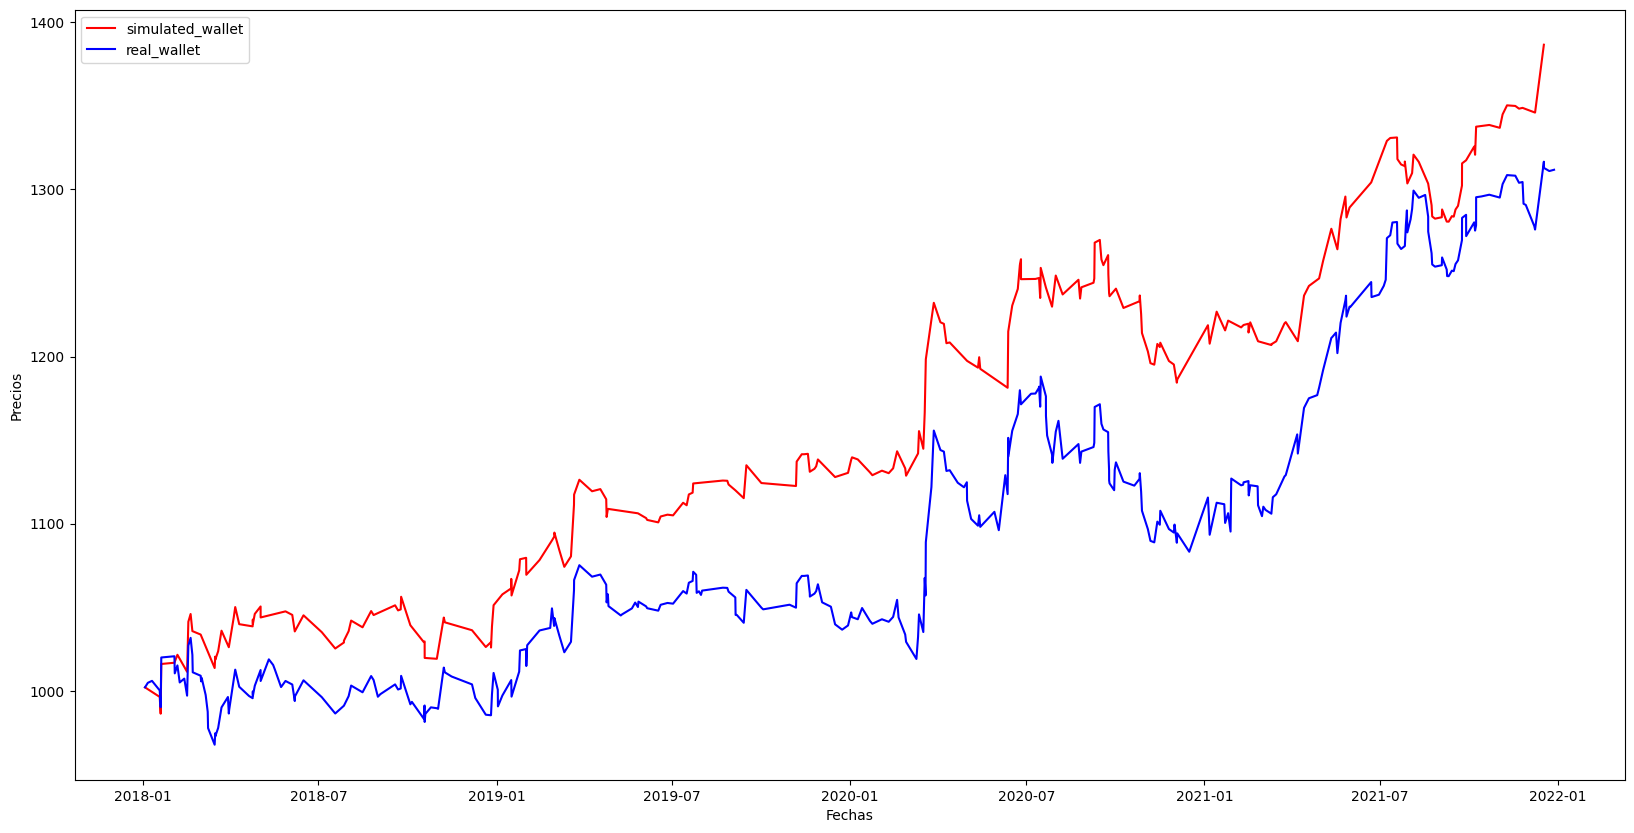

In [35]:
import matplotlib.pyplot as plt
import numpy as np


# Datos de ejemplo
x_wallet = pd.to_datetime(orders_min['close_time'])
y_wallet = orders_min['wallet']  # Datos para la línea
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='simulated_wallet', color='red')



# Datos de ejemplo
x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea
# Crear una figura y ejes
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='real_wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [36]:
true_values = pd.read_csv(os.path.join(root_path, path, 'trainres.csv'))
predictions = pd.read_csv(os.path.join(root_path, path, 'test_res.csv')).dropna()

In [37]:
predictions

,ticker,date,y_true,y_pred,proba
0,EURUSD,2018-01-12 15:00:00,0.0000,0.0000,0.5065
1,EURUSD,2018-01-12 23:00:00,0.0000,0.0000,0.5058
2,EURUSD,2018-02-13 11:00:00,0.0000,0.0000,0.5043
3,EURUSD,2018-02-21 01:00:00,0.0000,0.0000,0.5041
4,EURUSD,2018-03-02 23:00:00,0.0000,0.0000,0.5013
5,EURUSD,2018-03-05 01:00:00,0.0000,0.0000,0.5108
6,EURUSD,2018-03-08 13:00:00,0.0000,1.0000,0.5299
7,EURUSD,2018-03-15 22:00:00,0.0000,1.0000,0.5012
8,EURUSD,2018-03-16 03:00:00,0.0000,1.0000,0.5019
9,EURUSD,2018-03-19 03:00:00,0.0000,1.0000,0.5343


In [38]:
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, classification_report

precision = precision_score(predictions.y_true, predictions.y_pred, average='weighted')
recall = recall_score(predictions.y_true, predictions.y_pred, average='weighted')
f1 = f1_score(predictions.y_true, predictions.y_pred, average='weighted')

print(precision)
print(recall)
print(f1)

0.5314898010293524
0.5218417945690673
0.5253514172624092


              precision    recall  f1-score   support

         0.0       0.61      0.56      0.58       505
         1.0       0.42      0.47      0.44       342

    accuracy                           0.52       847
   macro avg       0.51      0.51      0.51       847
weighted avg       0.53      0.52      0.53       847

Confusion Matrix
[[281 224]
 [181 161]]


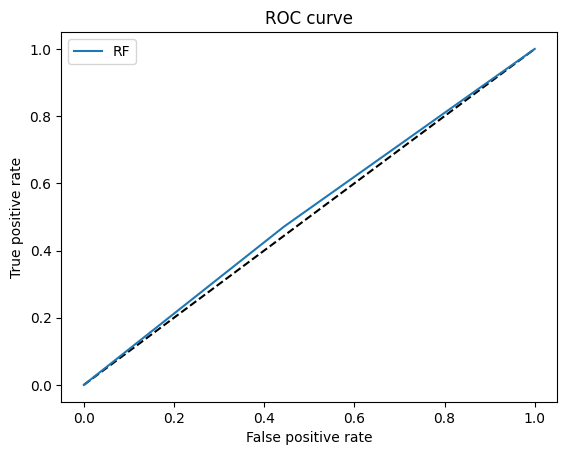

In [39]:
fpr_rf, tpr_rf, _ = roc_curve(predictions['y_true'], predictions['y_pred'])
print(classification_report(predictions['y_true'], predictions['y_pred']))

print("Confusion Matrix")
print(confusion_matrix(predictions['y_true'], predictions['y_pred']))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [40]:
predictions['binary_pred'] = np.where(
    (predictions['y_pred']==0), 
    1 - predictions['proba'], 
    predictions['proba']
)

predictions

,ticker,date,y_true,y_pred,proba,binary_pred
0,EURUSD,2018-01-12 15:00:00,0.0000,0.0000,0.5065,0.4935
1,EURUSD,2018-01-12 23:00:00,0.0000,0.0000,0.5058,0.4942
2,EURUSD,2018-02-13 11:00:00,0.0000,0.0000,0.5043,0.4957
3,EURUSD,2018-02-21 01:00:00,0.0000,0.0000,0.5041,0.4959
4,EURUSD,2018-03-02 23:00:00,0.0000,0.0000,0.5013,0.4987
5,EURUSD,2018-03-05 01:00:00,0.0000,0.0000,0.5108,0.4892
6,EURUSD,2018-03-08 13:00:00,0.0000,1.0000,0.5299,0.5299
7,EURUSD,2018-03-15 22:00:00,0.0000,1.0000,0.5012,0.5012
8,EURUSD,2018-03-16 03:00:00,0.0000,1.0000,0.5019,0.5019
9,EURUSD,2018-03-19 03:00:00,0.0000,1.0000,0.5343,0.5343


<Axes: >

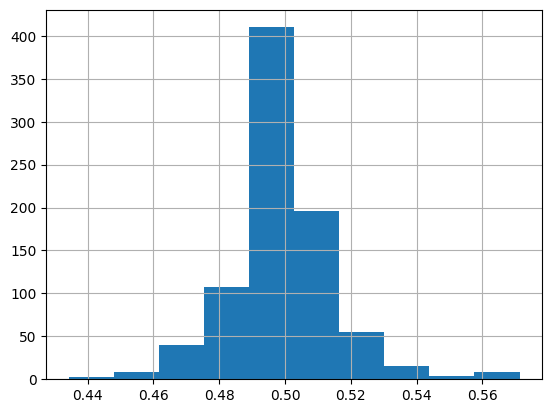

In [41]:
predictions.binary_pred.hist()

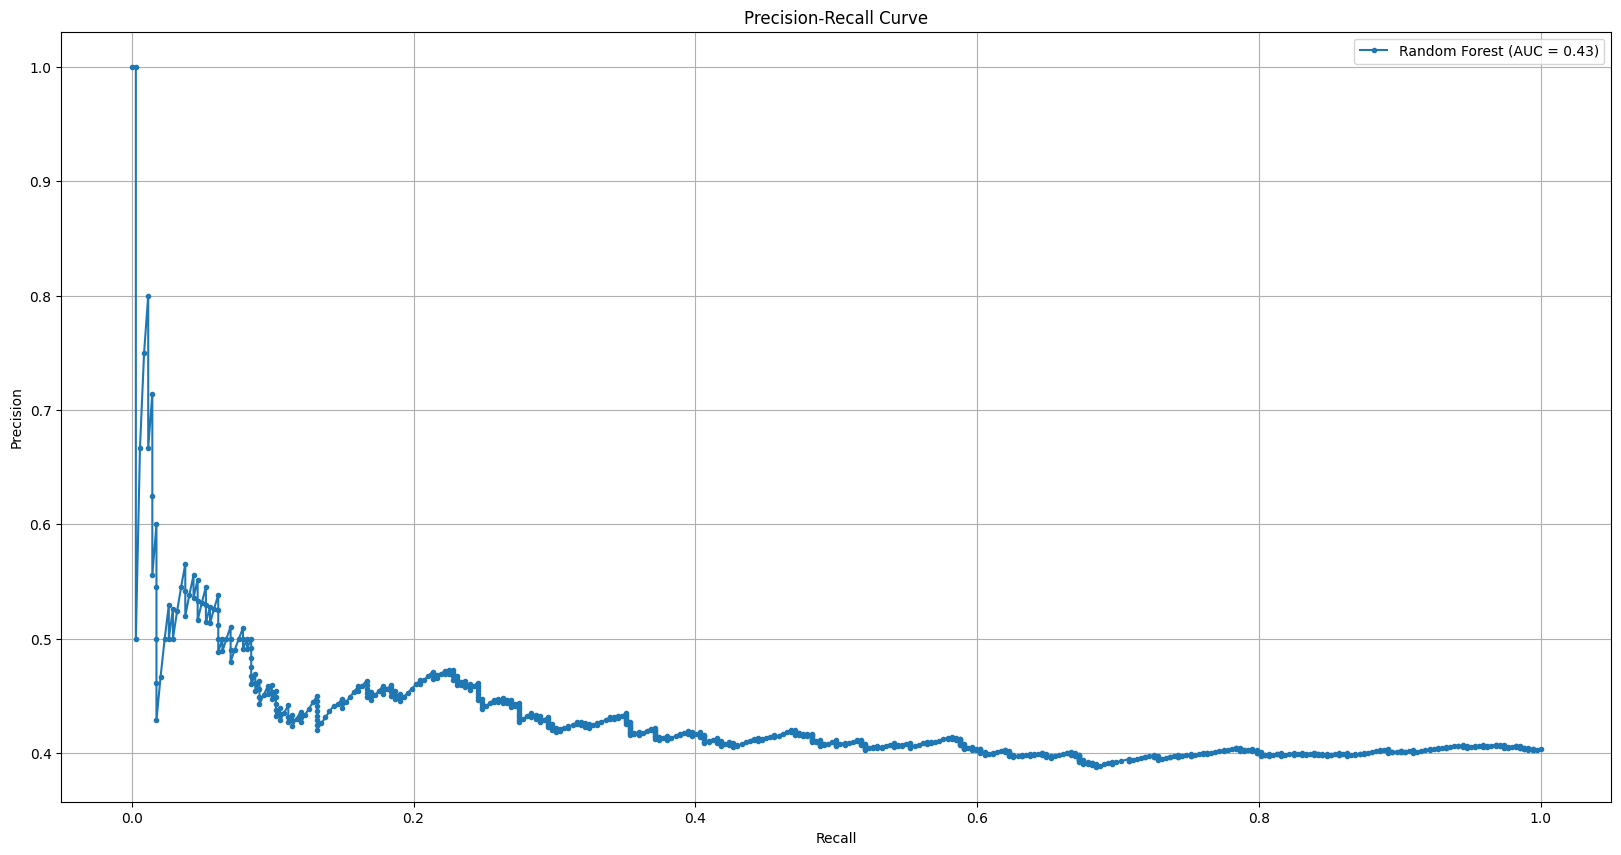

In [42]:
precision, recall, thresholds = precision_recall_curve(predictions['y_true'], predictions['binary_pred'])
pr_auc = auc(recall, precision)
# Plotear la curva de precisión/recall
plt.figure(figsize=(20, 10))

plt.plot(recall, precision, marker='.', label=f'Random Forest (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [43]:
import numpy as np
from sklearn.metrics import precision_recall_curve

def find_best_threshold_fbeta(y_true, y_proba, beta=0.01):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    
    # Calcular F-beta scores
    fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)
    
    # Evitar división por cero y resultados nan
    fbeta_scores = np.nan_to_num(fbeta_scores)
    
    # Encontrar el umbral que maximiza el F-beta score
    index = np.argmax(fbeta_scores)
    best_threshold = thresholds[index]
    best_precision = precision[index]
    best_recall = recall[index]
    best_fbeta = np.max(fbeta_scores)
    
    return best_threshold, best_precision, best_recall, best_fbeta



In [44]:
find_best_threshold_fbeta(predictions['y_true'], predictions['binary_pred'], beta=0.05)

(0.5658419752491793, 0.8, 0.011695906432748537, 0.6848847139197267)

In [45]:
threshold = 0.45
preds = np.where(
    (predictions['binary_pred']<=threshold),
    0, 
    1
)

print(classification_report(predictions.y_true, preds))

              precision    recall  f1-score   support

         0.0       0.50      0.00      0.01       505
         1.0       0.40      0.99      0.57       342

    accuracy                           0.40       847
   macro avg       0.45      0.50      0.29       847
weighted avg       0.46      0.40      0.24       847



In [46]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier

def get_xgboost_feature_importance_from_stacking(pipeline):
    """
    Obtiene la importancia de las características del XGBClassifier dentro de un StackingClassifier.

    Parameters:
    pipeline (Pipeline): Un objeto pipeline de sklearn entrenado que contiene un StackingClassifier.

    Returns:
    dict: Un diccionario donde las claves son los nombres de las características y los valores son su importancia.
    """
    if not isinstance(pipeline, Pipeline):
        raise ValueError("El parámetro debe ser un objeto de tipo Pipeline de sklearn.")

    # Intentar obtener el último estimador del pipeline
    final_estimator = pipeline.named_steps[list(pipeline.named_steps.keys())[-1]]

    # Comprobar si el estimador final es un StackingClassifier
    if not isinstance(final_estimator, StackingClassifier):
        raise ValueError("El estimador final del pipeline no es un StackingClassifier.")
    
    # Obtener el ProbabilityTransformer del stack
    prob_transf = final_estimator.named_estimators_['prob_transf']
    
    # Obtener el modelo XGBClassifier dentro del ProbabilityTransformer
    xgb_model = prob_transf.model
    
    # Comprobar si el XGBClassifier tiene el atributo feature_importances_
    if not hasattr(xgb_model, 'feature_importances_'):
        raise ValueError("El XGBClassifier no tiene el atributo feature_importances_.")

    importances = xgb_model.feature_importances_

    # Obtener los nombres de las características
    first_transformer = pipeline.named_steps[list(pipeline.named_steps.keys())[0]]
    if hasattr(first_transformer, 'get_feature_names_out'):
        feature_names = first_transformer.get_feature_names_out()
    else:
        feature_names = pipeline['preprocessor'].get_feature_names_out()  # Ajustar según el nombre de tu primer paso

    return dict(zip(feature_names, importances))

In [47]:
pipeline_path = os.path.join(root_path, path, 'pipe.pkl')

In [48]:
import joblib

with open(pipeline_path, 'rb') as file:
    pipeline = joblib.load(file)

# features = pipeline.named_steps[list(pipeline.named_steps.keys())[-1]].named_estimators_['prob_transf']
features = get_xgboost_feature_importance_from_stacking(pipeline)

In [49]:
names = []
values = []

for k, v in features.items():
    names.append(k)
    values.append(v)

features_df = pd.DataFrame({'feature':names, 'importance':values})
features_df.sort_values(by='importance', ascending=False)


,feature,importance
39,hour,0.0464
7,rsi,0.0441
18,mfi,0.0437
28,diff_pips_2_day,0.0435
0,Volume,0.0432
4,sma_26,0.0418
22,macdhist,0.0414
30,diff_pips_h,0.0395
31,diff_pips_h_shift_1,0.0384
37,diff_pips_l_shift_1,0.0384


In [50]:


from sklearn.metrics import precision_score, f1_score, recall_score



tickers = config["tickers"] 
tickers

predictions = predictions.sort_values(by='fecha')
true_values = true_values.sort_values(by='fecha')


# renombro las columnas
column_names = {}
for column in predictions.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_preds'

predictions = predictions.rename(columns=column_names)

column_names = {}
for column in true_values.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_true'

true_values = true_values.rename(columns=column_names)
performance = pd.concat(
    [
        predictions,
        true_values
    ], axis=1, join="inner"
)

recall_list = []
f1_list = []
precision_list = []

for ticker in tickers:
    y_true = performance[performance[f'{ticker}_true'].notna()][f'{ticker}_true']
    y_pred = performance[performance[f'{ticker}_preds'].notna()][f'{ticker}_preds']
    
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # print(classification_report(performance[f'{ticker}_true'], performance[f'{ticker}_preds'], target_names=target_names))
    
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    

KeyError: 'fecha'

# Grafico de velas

In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure(data=[go.Candlestick(x=prices['Date'],
#                 open=prices['Open'],
#                 high=prices['High'],
#                 low=prices['Low'],
#                 close=prices['Close'])])

# fig.update_layout(
#     title=f"{config['ticker']}",
#     yaxis_title=f"{config['ticker']} Stock"
# )

# fig.show()

# Estrategia

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['fecha'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

ax.plot(x_wallet, y_wallet, label='wallet', color='purple')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['date'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc

print('Area bajo la curva: ', auc(wallet.index, wallet['wallet']))

# Datos de ejemplo
x_prices = pd.to_datetime(wallet['date'])
y_prices = wallet['wallet']  # Datos para la línea


# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='Wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


# Modelo

In [ ]:
predictions.sort_values(by='fecha')

In [ ]:
true_values.sort_values(by='fecha')

In [ ]:
accuracy_score(predictions[predictions['YPF'].notna()].YPF, true_values[true_values['YPF'].notna()].YPF)

In [ ]:
threshold_down = 0.5
threshold_up = 0.5

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
threshold_down = 0.1
threshold_up = 0.9

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
plt.hist(performance.y_pred, color='lightgreen', ec='black', bins=50)
plt.show()

In [ ]:
buys = buys.rename(columns={''})

In [ ]:
operations = pd.concat([buys[buys['YPF'].notna()], sells[sells['YPF'].notna()]], axis=1, join="inner")[['fecha','YPF']]
operations

In [ ]:
operations['positive'] = np.where(operations['buy']>operations['sell'], 0, 1)
operations['Profit'] = operations['sell'] - operations['buy'] 
operations['positive'].value_counts()